# import the Necessary Libraries

In [85]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import  model_selection,preprocessing,impute ,cluster , metrics , svm, feature_selection , tree , ensemble ,linear_model ,neighbors
from tqdm import tqdm

In [86]:
df = pd.read_excel('depression_data.xlsx')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Gender,Age,Weight,sleep problems,sucude attends,dipression ritio,Infected relatives,shock,related diseases,اAcademic performance
0,NaN,NaN,NaN,NaN,NaN,NaN,male,20.0,80,no,yes,10.0,yes,yes,no,yes
1,NaN,NaN,NaN,NaN,NaN,NaN,male,21.0,78,sometimes,no,6.0,no,no,no,no
2,NaN,NaN,NaN,NaN,NaN,NaN,female,20.0,67,sometimes,no,7.0,no,no,no,no
3,NaN,NaN,NaN,NaN,NaN,NaN,male,23.0,78,sometimes,no,8.0,no,no,no,yes
4,NaN,NaN,NaN,NaN,NaN,NaN,male,22.0,78,no,yes,1.0,yes,no,yes,not student
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,NaN,NaN,NaN,NaN,NaN,NaN,female,NaN,NaN,sometimes,no,5.0,no,yes,no,not student
292,NaN,NaN,NaN,NaN,NaN,NaN,male,47.0,87,yes,no,5.0,no,no,no,not student
293,NaN,NaN,NaN,NaN,NaN,NaN,male,47.0,87,yes,no,5.0,no,no,no,not student
294,NaN,NaN,NaN,NaN,NaN,NaN,male,57.0,97,sometimes,no,1.0,no,no,no,not student


# drop the unnecessary columns

In [87]:
df.drop(['Unnamed: 0','Unnamed: 1','Unnamed: 2',"Unnamed: 3",'Unnamed: 4','Unnamed: 5'],axis=1,inplace=True)

In [88]:

df['Weight'].replace({' ':np.nan},inplace=True)
df['Weight'].unique()


array([ 80. ,  78. ,  67. ,  65. ,   nan,  50. ,  55. ,  76. ,  73. ,
        66. ,  47. ,  74. ,  58. ,  69. ,  90. ,  64. ,  59. ,  52. ,
        70. ,  77. ,  60. ,  85. , 159. ,  57. ,  46. ,  56. ,  68. ,
        45. ,  62. ,  63. ,  40. , 202. ,  54. ,  84. ,  35. ,  83. ,
        44. , 103. ,  53. ,  75. ,  87. ,  71. ,  48. ,  66.4,  88. ,
        20. ,  61. ,  42. ,  30. ,  43. , 115. ,  98. , 104. ,  81. ,
        51. ,  62.5, 120. ,  49. ,  89. ,  97. ])

In [89]:
df

,Gender,Age,Weight,sleep problems,sucude attends,dipression ritio,Infected relatives,shock,related diseases,اAcademic performance
0,male,20.0,80.0,no,yes,10.0,yes,yes,no,yes
1,male,21.0,78.0,sometimes,no,6.0,no,no,no,no
2,female,20.0,67.0,sometimes,no,7.0,no,no,no,no
3,male,23.0,78.0,sometimes,no,8.0,no,no,no,yes
4,male,22.0,78.0,no,yes,1.0,yes,no,yes,not student
...,...,...,...,...,...,...,...,...,...,...
291,female,NaN,NaN,sometimes,no,5.0,no,yes,no,not student
292,male,47.0,87.0,yes,no,5.0,no,no,no,not student
293,male,47.0,87.0,yes,no,5.0,no,no,no,not student
294,male,57.0,97.0,sometimes,no,1.0,no,no,no,not student


In [90]:
df['Gender'].unique() 


array(['male', 'female', nan], dtype=object)

# creat tokenizer function to change categrocal columns to numercal  

In [92]:
f = df.dropna()
f

,Gender,Age,Weight,sleep problems,sucude attends,dipression ritio,Infected relatives,shock,related diseases,اAcademic performance
0,male,20.0,80.0,no,yes,10.0,yes,yes,no,yes
1,male,21.0,78.0,sometimes,no,6.0,no,no,no,no
2,female,20.0,67.0,sometimes,no,7.0,no,no,no,no
3,male,23.0,78.0,sometimes,no,8.0,no,no,no,yes
4,male,22.0,78.0,no,yes,1.0,yes,no,yes,not student
...,...,...,...,...,...,...,...,...,...,...
289,female,43.0,78.0,yes,no,5.0,no,no,no,not student
292,male,47.0,87.0,yes,no,5.0,no,no,no,not student
293,male,47.0,87.0,yes,no,5.0,no,no,no,not student
294,male,57.0,97.0,sometimes,no,1.0,no,no,no,not student


In [93]:
def tokenizer(feature):
    word_id={}
    id_word = {}
    for id_,word in enumerate(feature.unique()): 
            
        word_id[word]=id_ 
        id_word[id] = word
    return word_id,id_word

In [94]:
# the categrcal columns 
columns_shoud_Tokenize=[]
for feature in df.columns:
    if df[feature].dtype in ['object']:   
        columns_shoud_Tokenize.append(feature)
print(columns_shoud_Tokenize)



['Gender', 'sleep problems', 'sucude attends', 'Infected relatives', 'shock', 'related diseases', 'اAcademic performance']


In [95]:
Gender_id,id_Gender= tokenizer(f.Gender)
df.Gender.replace(Gender_id,inplace=True)

sleep_problems_id,id_sleep_problems= tokenizer(f['sleep problems'])
df['sleep problems'].replace(sleep_problems_id,inplace=True)


sucude_attends_id,id_sucude_attends= tokenizer(f['sucude attends'])
df['sucude attends'].replace(sucude_attends_id,inplace=True)

Infected_relatives_id,id_Infected_relativess= tokenizer(f['Infected relatives'])
df['Infected relatives'].replace(Infected_relatives_id,inplace=True)

shock_id,id_shock= tokenizer(f['shock'])
df['shock'].replace(shock_id,inplace=True)

related_diseases_id,id_related_diseases= tokenizer(f['related diseases'])
df['related diseases'].replace(related_diseases_id,inplace=True)

اAcademic_performance_id,id_اAcademic_performance= tokenizer(f['اAcademic performance'])
df['اAcademic performance'].replace(اAcademic_performance_id,inplace=True)


In [96]:
# to see the mean of each simple
print(Gender_id)
print(sleep_problems_id)
print(sucude_attends_id)
print(Infected_relatives_id)
print(shock_id)
print(related_diseases_id)
print(اAcademic_performance_id)

{'male': 0, 'female': 1}
{'no': 0, 'sometimes': 1, 'yes': 2}
{'yes': 0, 'no': 1}
{'yes': 0, 'no': 1}
{'yes': 0, 'no': 1}
{'no': 0, 'yes': 1}
{'yes': 0, 'no': 1, 'not student': 2}


In [97]:
df

,Gender,Age,Weight,sleep problems,sucude attends,dipression ritio,Infected relatives,shock,related diseases,اAcademic performance
0,0.0,20.0,80.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
1,0.0,21.0,78.0,1.0,1.0,6.0,1.0,1.0,0.0,1.0
2,1.0,20.0,67.0,1.0,1.0,7.0,1.0,1.0,0.0,1.0
3,0.0,23.0,78.0,1.0,1.0,8.0,1.0,1.0,0.0,0.0
4,0.0,22.0,78.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
291,1.0,NaN,NaN,1.0,1.0,5.0,1.0,0.0,0.0,2.0
292,0.0,47.0,87.0,2.0,1.0,5.0,1.0,1.0,0.0,2.0
293,0.0,47.0,87.0,2.0,1.0,5.0,1.0,1.0,0.0,2.0
294,0.0,57.0,97.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0


# handle missing values with imputer model 

In [100]:
# initialize the KNNImputer
imp = impute.KNNImputer(n_neighbors=5, weights="uniform")
# Fit impute on the dataset 
imp.fit(df)
# Imputation of missing values
new_dataset_imp = imp.transform(df)

In [101]:
# Create DataFrame from new_dataset_imp
new_dataset_imp = pd.DataFrame(new_dataset_imp,columns=df.columns)
new_dataset_imp.isna().sum()

Gender                   0
Age                      0
Weight                   0
sleep problems           0
sucude attends           0
dipression ritio         0
Infected relatives       0
shock                    0
related diseases         0
اAcademic performance    0
dtype: int64

# use unsuperviased algorithms to get the label column `y` 

In [102]:
# Create the Mini Batch KMeans n_clusters = 2 
kmeans = cluster.MiniBatchKMeans(n_clusters=2,random_state=42)
# Fit the Mini Batch KMeans cluster on the features
kmeans.fit(new_dataset_imp)
# print the clusters
print(f"the cluster in the dataset are: {kmeans.labels_}")

# get the cluster centers
print(f"get the cluster centers: \n{kmeans.cluster_centers_}")


C:\Users\hp center\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(


the cluster in the dataset are: [0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1
 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1
 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1
 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1
 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0]
get the cluster centers: 
[[3.31963658e-01 2.68309921e+01 7.84398811e+01 8.48856785e-01
  8.93245218e-01 5.19140985e+00 6.62190861e-01 5.03424188e-01
  3.70606302e-02 7.67153416e-01]
 [7.38438310e-01 2.03786056e+01 5.54978594e+01 1.01525006e+00
  8.14765302e-01 5.50259611e+00 7.48806226e-01 5.32726666e-01
  4.70323309e-02 5.92905569e-01]]


In [103]:
new_dataset_imp['dipressed']=kmeans.labels_ 


In [105]:
new_dataset_imp
# 0 ==  depressed 
# 1 ==  not depressed

,Gender,Age,Weight,sleep problems,sucude attends,dipression ritio,Infected relatives,shock,related diseases,اAcademic performance,dipressed
0,0.0,20.0,80.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0
1,0.0,21.0,78.0,1.0,1.0,6.0,1.0,1.0,0.0,1.0,0
2,1.0,20.0,67.0,1.0,1.0,7.0,1.0,1.0,0.0,1.0,1
3,0.0,23.0,78.0,1.0,1.0,8.0,1.0,1.0,0.0,0.0,0
4,0.0,22.0,78.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
291,1.0,20.8,49.4,1.0,1.0,5.0,1.0,0.0,0.0,2.0,1
292,0.0,47.0,87.0,2.0,1.0,5.0,1.0,1.0,0.0,2.0,0
293,0.0,47.0,87.0,2.0,1.0,5.0,1.0,1.0,0.0,2.0,0
294,0.0,57.0,97.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0


In [106]:
new_dataset_imp.describe() 

,Gender,Age,Weight,sleep problems,sucude attends,dipression ritio,Infected relatives,shock,related diseases,اAcademic performance,dipressed
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,0.591864,22.823544,63.879666,0.959322,0.854236,5.334933,0.732206,0.520001,0.044068,0.650152,0.662162
std,0.490660,9.651071,16.427024,0.780074,0.352868,2.709900,0.440355,0.498785,0.205246,0.670283,0.473774
min,0.000000,15.000000,20.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.000000,55.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,20.900000,61.200000,1.000000,1.000000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,22.000000,70.000000,2.000000,1.000000,7.250000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,101.000000,202.000000,2.000000,1.000000,10.000000,1.000000,1.000000,1.000000,2.000000,1.000000


# chack for balance data 

In [107]:
new_dataset_imp['dipressed'].value_counts()

1    196
0    100
Name: dipressed, dtype: int64

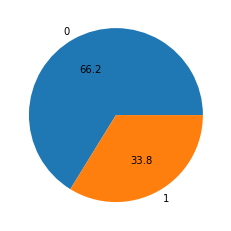

In [108]:
plt.pie(new_dataset_imp['dipressed'].value_counts() , labels=new_dataset_imp['dipressed'].unique(),autopct='%1.1f' )
plt.show()

In [109]:
new_data = new_dataset_imp[new_dataset_imp['dipressed'] ==0]  
new_data= new_data.append(new_dataset_imp[new_dataset_imp['dipressed'] ==1].sample(n=110,random_state=42))

C:\Users\hp center\AppData\Local\Temp\ipykernel_7996\1872750924.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data= new_data.append(new_dataset_imp[new_dataset_imp['dipressed'] ==1].sample(n=110,random_state=42))


In [110]:
new_data.reset_index(inplace=True,drop=True)

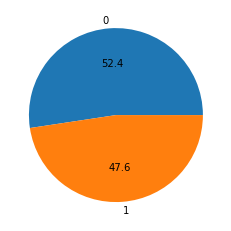

In [111]:
plt.pie(new_data['dipressed'].value_counts() , labels=new_data['dipressed'].unique(),autopct='%1.1f' )
plt.show()

In [112]:
# Split the data to feature and target.¶

In [113]:
x = new_data.drop(columns=['dipressed'])
y = new_data['dipressed'] 

In [114]:
print(x.shape)
print(y.shape)

(210, 10)
(210,)


# Normalize the features.

In [115]:
normalizer = preprocessing.StandardScaler()
x_norm = normalizer.fit_transform(x)

# Define a function to split the data to train and test for cross validation

In [116]:
def train_test_split(x, y, train_indices, test_indices):
    
    return x[train_indices], x[test_indices], y[train_indices], y[test_indices]

# Get Best Number Features to Select

In [117]:
# Define the cross validation method

kfold = model_selection.StratifiedShuffleSplit(n_splits=10,random_state=42)
# Define empty dictionary for records
# k equal to number Features to Select
best_k = {
    'k':[],
    'f1_score':[],
    'recall_score':[],
    'precision_score':[]
}

for k in tqdm(range(len(x.columns))):
  
    f1_score = []
    recall_score = []
    precision_score = []
    k +=1

    # Create the model
    lsvc = svm.SVC(kernel='linear',max_iter=-1)
    # Define the feature selection method
    feature_selector = feature_selection.RFE(lsvc,n_features_to_select=k)
    # fit the feature Selection method on the x_norm and y
    feature_selector.fit(x_norm,y)

    # get the new fetures 
    new_x = feature_selector.transform(x_norm)

    # Evaluate model on the features for defiant k 
    for train_indexes,test_indexes in kfold.split(new_x,y):
        x_train,x_test,y_train,y_test = train_test_split(new_x,y,train_indexes,test_indexes,)

        model = svm.SVC()
        model.fit(x_train,y_train)
        pred = model.predict(x_test) 


        f1_score.append(metrics.f1_score(y_test,pred))
        recall_score.append(metrics.recall_score(y_test,pred))
        precision_score.append( metrics.precision_score(y_test,pred))



    best_k['k'].append(k)
    best_k['f1_score'].append( np.mean(f1_score))
    best_k['recall_score'].append(np.mean( recall_score))
    best_k['precision_score'].append( np.mean(precision_score))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.12it/s]


In [118]:
# Conver scores array to dataframe
scores_df = pd.DataFrame(best_k)
scores_df

,k,f1_score,recall_score,precision_score
0,1,0.962690,0.954545,0.974242
1,2,0.966190,0.936364,1.000000
2,3,0.975714,0.954545,1.000000
3,4,0.973499,0.981818,0.966667
4,5,0.968323,0.972727,0.966667
5,6,0.960441,0.981818,0.941434
6,7,0.959684,0.972727,0.947727
7,8,0.932731,0.945455,0.922576
8,9,0.922354,0.963636,0.886672
9,10,0.937549,0.963636,0.913636


# Feature selection

In [119]:
# Create the linear model
svc = svm.SVC(kernel='linear',max_iter=-1)
# Define the feature selection method

# feature_selector = SelectFromModel(svc,max_features=11)
feature_selector = feature_selection.RFE(svm.SVC(kernel='linear',max_iter=-1), n_features_to_select=4)


# fit the feature Selection method on the x_norm and y
new_x=feature_selector.fit_transform(x_norm, y)
# get the new fetures 

new_x.shape


(210, 4)

In [120]:
# the best feutures
x.iloc[:,feature_selector.get_support()]

,Gender,Age,Weight,Infected relatives
0,0.0,20.0,80.0,0.0
1,0.0,21.0,78.0,1.0
2,0.0,23.0,78.0,1.0
3,0.0,22.0,78.0,0.0
4,0.0,19.0,76.0,1.0
...,...,...,...,...
205,1.0,21.0,50.0,1.0
206,1.0,20.0,58.6,0.0
207,1.0,20.0,60.0,1.0
208,1.0,17.0,60.0,0.0


# Modeling

#### a little trick for choosing the best model  

In [121]:
test = new_data.sample(n=25)

x= test.drop(['dipressed'] ,axis=1)
y = test['dipressed'] 
x_train , x_test , y_train ,y_test = model_selection.train_test_split(x,y,random_state=42 ,test_size=0.1)

In [122]:
svc = svm.SVC()
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)
ac_sv = metrics.f1_score(y_pred,y_test)
ac_sv

0.6666666666666666

# train model with cross validition

In [123]:
print(f"Training model on {new_x.shape[-1]} features")

# splits the data into 10 splits, using 9 for training and 1 for testing in each iteration with setting up the random state to 42
stratified_shuffled_k_fold = model_selection.StratifiedShuffleSplit(n_splits=10,random_state=42) 
# Empty arrays to store the scores
accuracy = []
precision = []
recall = []
f1_score = []

for train_indices, test_indices in tqdm(stratified_shuffled_k_fold.split(new_x, y)): 
    # y is needed here for stratification, similar to stratify = y.
    # Split data using our predefined function
    x_train, x_test, y_train, y_test = train_test_split(
        new_x, y, train_indices, test_indices
    )

    # Train model
    svc = svm.SVC()
    svc.fit(x_train, y_train)

    # Predict using test set
    y_pred = svc.predict(x_test)

    # Calculate scores
    accuracy.append( metrics.accuracy_score(y_test, y_pred))
    precision.append( metrics.precision_score(y_test, y_pred))
    recall.append( metrics.recall_score(y_test, y_pred))
    f1_score.append(metrics.f1_score(y_test, y_pred))

Training model on 4 features


0it [00:00, ?it/s]


ValueError: Found input variables with inconsistent numbers of samples: [210, 25]

In [ ]:
# Conver scores array to dataframe
scores_df = pd.DataFrame({"accuracy": accuracy, 
                          "precision": precision, 
                          "recall": recall,
                          "F1":f1_score})
scores_df

In [124]:
scores_df.mean() 

k                  5.500000
f1_score           0.955918
recall_score       0.962727
precision_score    0.951962
dtype: float64

# use grid search for find the best parameter for the model

In [125]:
# defing the base model
svc = svm.SVC()
# defing a dict for the parameter that i want to test 
params = {'kernel': [ 'poly','linear', 'rbf', 'sigmoid'], 
          'C': np.arange(1,100,5)}


In [126]:
# define the scoring 
scoring={

    
    'F1':metrics.make_scorer( metrics.f1_score),
    'precision_score':metrics.make_scorer( metrics.precision_score),
    'recall_score':metrics.make_scorer( metrics.recall_score),


}

In [127]:
kfold = model_selection.StratifiedShuffleSplit(n_splits=5, random_state=42)

In [128]:
gs = model_selection.GridSearchCV(svc, params, cv=kfold, 
                                  scoring=scoring, 
                                  refit="F1",
                                  n_jobs=-1,
                                 
                                )

In [129]:
gs.fit(x, y)


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=None,
            train_size=None),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]),
                         'kernel': ['poly', 'linear', 'rbf', 'sigmoid']},
             refit='F1',
             scoring={'F1': make_scorer(f1_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

In [130]:
print("Best Hyperparameters:", gs.best_params_)
print("Best Score (F1): ", gs.best_score_)

Best Hyperparameters: {'C': 1, 'kernel': 'linear'}
Best Score (F1):  1.0


In [131]:
# We can also get the best model it found using best_estimator_ field. 
best_svc = gs.best_estimator_
best_svc 

SVC(C=1, kernel='linear')

In [132]:
# We will convert cv_results_ to a DataFrame using pandas for easier viewing.
df = pd.DataFrame(gs.cv_results_)
# sort the dataframe on the mean_test_f1 score
df.sort_values(['mean_test_F1'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_F1,split1_test_F1,split2_test_F1,...,std_test_precision_score,rank_test_precision_score,split0_test_recall_score,split1_test_recall_score,split2_test_recall_score,split3_test_recall_score,split4_test_recall_score,mean_test_recall_score,std_test_recall_score,rank_test_recall_score
39,0.003125,0.006250,0.006250,0.007655,46,sigmoid,"{'C': 46, 'kernel': 'sigmoid'}",0.5,0.0,0.5,...,0.278887,67,0.5,0.0,0.5,0.0,1.0,0.4,0.374166,67
75,0.009374,0.012498,0.006251,0.007656,91,sigmoid,"{'C': 91, 'kernel': 'sigmoid'}",0.5,0.0,0.5,...,0.278887,67,0.5,0.0,0.5,0.0,1.0,0.4,0.374166,67
71,0.000000,0.000000,0.006250,0.007655,86,sigmoid,"{'C': 86, 'kernel': 'sigmoid'}",0.5,0.0,0.5,...,0.278887,67,0.5,0.0,0.5,0.0,1.0,0.4,0.374166,67
67,0.003125,0.006250,0.009376,0.007656,81,sigmoid,"{'C': 81, 'kernel': 'sigmoid'}",0.5,0.0,0.5,...,0.278887,67,0.5,0.0,0.5,0.0,1.0,0.4,0.374166,67
63,0.003125,0.006250,0.009374,0.007654,76,sigmoid,"{'C': 76, 'kernel': 'sigmoid'}",0.5,0.0,0.5,...,0.278887,67,0.5,0.0,0.5,0.0,1.0,0.4,0.374166,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,0.003125,0.006250,0.006250,0.007655,56,poly,"{'C': 56, 'kernel': 'poly'}",1.0,1.0,1.0,...,0.000000,1,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1
45,0.003125,0.006251,0.009376,0.007656,56,linear,"{'C': 56, 'kernel': 'linear'}",1.0,1.0,1.0,...,0.000000,1,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1
13,0.003126,0.006252,0.009371,0.007652,16,linear,"{'C': 16, 'kernel': 'linear'}",1.0,1.0,1.0,...,0.000000,1,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1
33,0.003125,0.006250,0.006252,0.007657,41,linear,"{'C': 41, 'kernel': 'linear'}",1.0,1.0,1.0,...,0.000000,1,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,1
